<a href="https://colab.research.google.com/github/ikhwandio4/PCVK_Ganjil_2024/blob/main/week7_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : ikhwandi

Nim: 2241720028

kelas: 3F

Matkul: pcvk

**praktikum filter**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


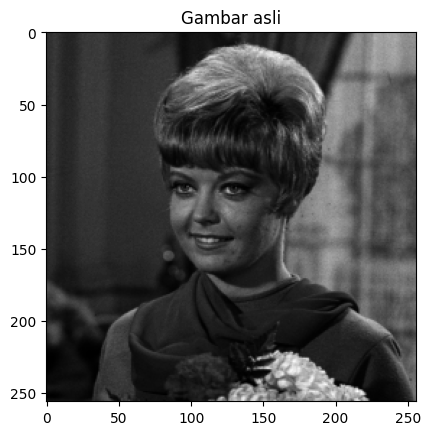

In [37]:
# Mount Google Drive jika belum dilakukan
from google.colab import drive
drive.mount('/content/drive')

# Baca gambar dari path di Google Drive
image_path = '/content/drive/MyDrive/pcvk/female.tiff'
img = cv.imread(image_path)

# Konversi ke grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Mendapatkan dimensi gambar
height, width = img_gray.shape

# Tampilkan gambar dengan dimensi dalam judul
plt.imshow(img_gray, cmap='gray')  # Tampilkan gambar dalam mode grayscale
plt.title(f"Gambar asli")
plt.show()


Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

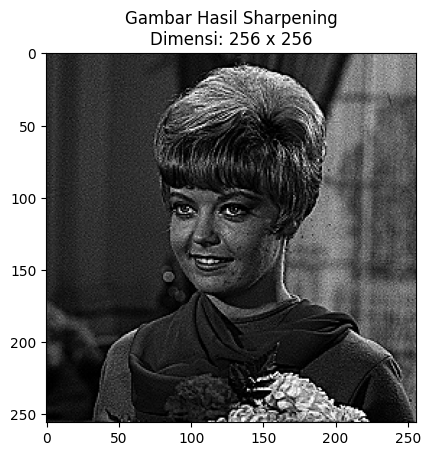

In [38]:
# Fungsi untuk menerapkan filter sharpen
def sharpen_filter(image):
    kernel_sharpen = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
    return cv.filter2D(image, -1, kernel_sharpen)

# Terapkan filter sharpen pada gambar grayscale
sharp_img = sharpen_filter(img_gray)

# Mendapatkan dimensi gambar sharpen
height, width = sharp_img.shape

# Tampilkan gambar sharpened dengan dimensi dalam judul
plt.imshow(sharp_img, cmap='gray')  # Tampilkan gambar dalam mode grayscale
plt.title(f"Gambar Hasil Sharpening\nDimensi: {width} x {height}")  # Judul dengan dimensi
plt.show()


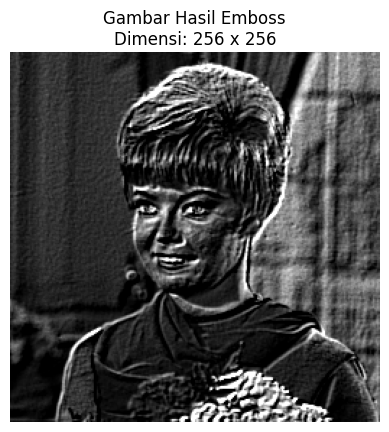

In [32]:
# Fungsi untuk menerapkan filter emboss
def emboss_filter(image):
    kernel_emboss = np.array([[-2, -1, 0],
                              [-1, 1, 1],
                              [0, 1, 2]])
    return cv.filter2D(image, -1, kernel_emboss)

# Terapkan filter emboss pada gambar grayscale
emboss_img = emboss_filter(img_gray)

# Mendapatkan dimensi gambar emboss
height, width = emboss_img.shape

# Tampilkan gambar emboss dengan dimensi dalam judul
plt.imshow(emboss_img, cmap='gray')  # Tampilkan gambar dalam mode grayscale
plt.title(f"Gambar Hasil Emboss\nDimensi: {width} x {height}")  # Judul dengan dimensi
plt.show()

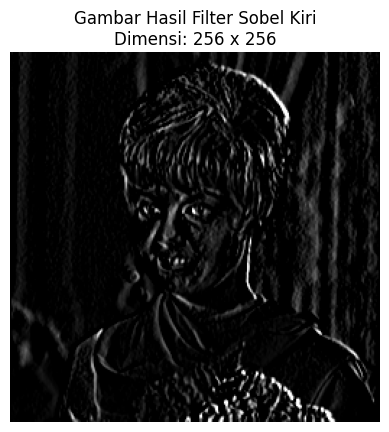

In [35]:
# Filter Sobel kiri: Mendeteksi perubahan intensitas piksel secara vertikal untuk mendeteksi tepi.
def left_sobel_filter(image):
    kernel_sobel_left = np.array([[1, 0, -1],
                                  [2, 0, -2],
                                  [1, 0, -1]])
    return cv.filter2D(image, -1, kernel_sobel_left)

# Terapkan filter Sobel kiri pada gambar grayscale
sobel_img = left_sobel_filter(img_gray)

# Mendapatkan dimensi gambar Sobel
height, width = sobel_img.shape

# Tampilkan gambar Sobel kiri dengan dimensi dalam judul
plt.imshow(sobel_img, cmap='gray')  # Tampilkan gambar dalam mode grayscale
plt.title(f"Gambar Hasil Filter Sobel Kiri\nDimensi: {width} x {height}")  # Judul dengan dimensi
plt.show()

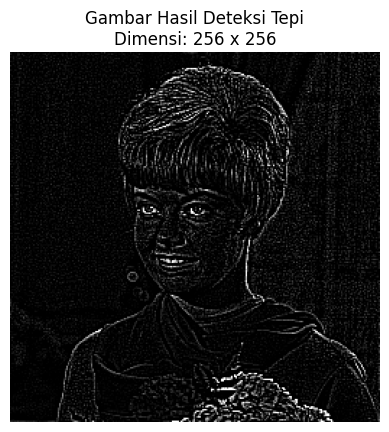

In [30]:
# Fungsi untuk mendeteksi tepi menggunakan kernel deteksi tepi
def edge_detection_kernel(image):
    kernel_edge = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, -1]])
    return cv.filter2D(image, -1, kernel_edge)

# Terapkan deteksi tepi pada gambar grayscale
edge_img = edge_detection_kernel(img_gray)

# Mendapatkan dimensi gambar tepi
height, width = edge_img.shape

# Tampilkan gambar tepi dengan dimensi dalam judul
plt.imshow(edge_img, cmap='gray')  # Tampilkan gambar dalam mode grayscale
plt.title(f"Gambar Hasil Deteksi Tepi\nDimensi: {width} x {height}")  # Judul dengan dimensi
plt.show()

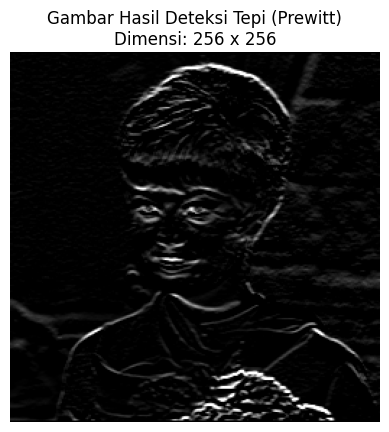

In [29]:
# Fungsi untuk mendeteksi tepi menggunakan filter Prewitt
def prewitt_edge_detection(image):
    kernel_prewitt = np.array([[-1, -1, -1],
                               [0, 0, 0],
                               [1, 1, 1]])
    grad = cv.filter2D(image, -1, kernel_prewitt)
    grad = np.abs(grad)  # Ambil nilai absolut
    return np.uint8(grad)  # Kembalikan hasil dalam format uint8

# Terapkan deteksi tepi Prewitt pada gambar grayscale
prewitt_img = prewitt_edge_detection(img_gray)

# Mendapatkan dimensi gambar Prewitt
height, width = prewitt_img.shape

# Tampilkan gambar Prewitt dengan dimensi dalam judul
plt.imshow(prewitt_img, cmap='gray')  # Tampilkan gambar dalam mode grayscale
plt.title(f"Gambar Hasil Deteksi Tepi (Prewitt)\nDimensi: {width} x {height}")  # Judul dengan dimensi
plt.show()


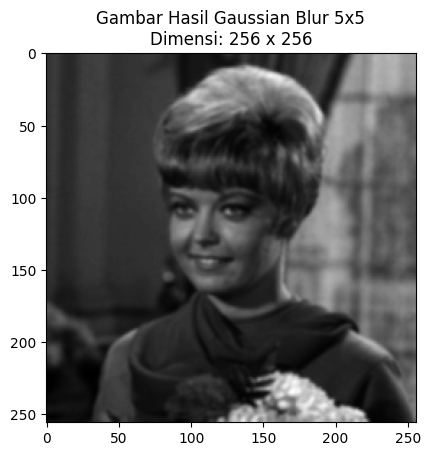

In [39]:
# Fungsi untuk menerapkan Gaussian Blur 5x5
def gaussian_blur_5x5(image):
    kernel_gaussian = np.array([[1, 4, 7, 4, 1],
                                [4, 16, 26, 16, 4],
                                [7, 26, 41, 26, 7],
                                [4, 16, 26, 16, 4],
                                [1, 4, 7, 4, 1]]) / 256
    return cv.filter2D(image, -1, kernel_gaussian)

# Terapkan Gaussian Blur 5x5 pada gambar grayscale
gaussian_img = gaussian_blur_5x5(img_gray)

# Mendapatkan dimensi gambar Gaussian
height, width = gaussian_img.shape

# Tampilkan gambar Gaussian Blur dengan dimensi dalam judul
plt.imshow(gaussian_img, cmap='gray')  # Tampilkan gambar dalam mode grayscale
plt.title(f"Gambar Hasil Gaussian Blur 5x5\nDimensi: {width} x {height}")  # Judul dengan dimensi
plt.show()

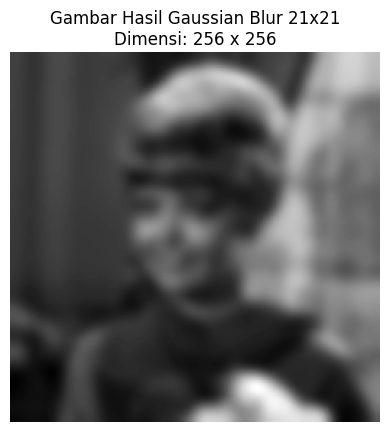

In [34]:
# Fungsi untuk menerapkan Gaussian Blur 21x21
def gaussian_blur_21x21(image):
    kernel_size = 21
    sigma = math.sqrt(kernel_size)  # Hitung sigma
    gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
    gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()  # Outer product

    # Terapkan blur dengan kernel Gaussian 21x21
    return cv.filter2D(image, -1, gauss_kernel)

# Terapkan Gaussian Blur 21x21 pada gambar grayscale
blurred_img = gaussian_blur_21x21(img_gray)

# Mendapatkan dimensi gambar Gaussian Blur
height, width = blurred_img.shape

# Tampilkan gambar Gaussian Blur 21x21 dengan dimensi dalam judul
plt.imshow(blurred_img, cmap='gray')  # Tampilkan gambar dalam mode grayscale
plt.title(f"Gambar Hasil Gaussian Blur 21x21\nDimensi: {width} x {height}")  # Judul dengan dimensi
plt.show()